# 01-Download-Example-Data.ipynb

## Download the example data from the Cloudnet dataportal and plot the classifications files target classification

In [18]:
import sys, os

root_dir = os.path.abspath('..')
sys.path.append(root_dir)

import glob
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt




In [26]:
# define the cloudnet colormap and labels function
def get_cloudnet_cmap():
    from cloudnetpy.plotting.plot_meta import _CLABEL
    # plot colormaps
    cloudnet_class_labels = [label[0] for label in _CLABEL['target_classification']]
    cloudnet_class_colors = [label[1] for label in _CLABEL['target_classification']]
    cloudnet_cmap = matplotlib.colors.ListedColormap(cloudnet_class_colors)
    cloudnet_class_labels[0] = 'Clear sky'

    for i, txt in enumerate(cloudnet_class_labels):
        cloudnet_class_labels[i] = txt.replace('&', '\&')

    return cloudnet_class_labels, cloudnet_cmap

### For stand-alone VOODOO processing you need to download the LVL0 binary files from rpg-fmcw-94 Doppler cloud radar and the corresponding classification file from the Cloudnet dataportal.

In [5]:
# Create a directory for the LVL0 binary files and change directory
rpg_files_dir = os.path.join(root_dir, 'sample_data', 'rpg-fmcw-94')
os.makedirs(rpg_files_dir, exist_ok=True)
os.chdir(rpg_files_dir)

In [3]:
# Download the LVL0 binary files
!curl "https://cloudnet.fmi.fi/api/raw-files?dateFrom=2023-02-17&dateTo=2023-02-17&site=eriswil&instrument=rpg-fmcw-94&filenameSuffix=.LV0" | jq '.[]["downloadUrl"]' | xargs -n1 curl -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35582    0 35582    0     0   133k      0 --:--:-- --:--:-- --:--:--  134k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.5M  100 28.5M    0     0  14.0M      0  0:00:02  0:00:02 --:--:-- 14.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 22 22.2M   22 5048k    0     0  5057k      0  0:00:04 --:--:--  0:00:04 5053k^C


In [6]:
# Create a directory for the classification files and change directory
classification_files_dir = os.path.join(root_dir, 'sample_data', 'classification')
os.makedirs(classification_files_dir, exist_ok=True)
os.chdir(classification_files_dir)

In [7]:
# Download the classification files
!curl "https://cloudnet.fmi.fi/api/files?dateFrom=2023-02-17&dateTo=2023-02-17&site=eriswil&product=classification" | jq '.[]["downloadUrl"]' | xargs -n1 curl -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1137    0  1137    0     0   6019      0 --:--:-- --:--:-- --:--:--  6015
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146k  100  146k    0     0   347k      0 --:--:-- --:--:-- --:--:--  347k


# Load the classification file

In [12]:
# fetch the classification file name
classification_files = glob.glob(os.path.join(classification_files_dir, '*.nc'))
print(classification_files)

# assuming there is only one classification file, open it
xr_class = xr.open_dataset(classification_files[0])
xr_class


['/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/classification/20230217_eriswil_classification.nc']


<xarray.Dataset> Size: 16MB
Dimensions:                 (time: 2826, height: 477)
Coordinates:
  * time                    (time) datetime64[ns] 23kB 2023-02-17T00:00:15.00...
  * height                  (height) float32 2kB 1.077e+03 ... 1.592e+04
Data variables:
    target_classification   (time, height) float64 11MB ...
    detection_status        (time, height) int32 5MB ...
    cloud_base_height_amsl  (time) float32 11kB ...
    cloud_top_height_amsl   (time) float32 11kB ...
    cloud_base_height_agl   (time) float32 11kB ...
    cloud_top_height_agl    (time) float32 11kB ...
    altitude                float32 4B ...
    latitude                float32 4B ...
    longitude               float32 4B ...
Attributes: (12/15)
    Conventions:                  CF-1.8
    cloudnetpy_version:           1.55.15
    file_uuid:                    58c290bc-0c77-41bc-bea8-e0121a33f07d
    cloudnet_file_type:           classification
    title:                        Classification products from Eriswil
    source_file_uuids:            eb78205f-839c-49f4-8887-2c532a51fa05
    ...                           ...
    year:                         2023
    source:                       METEK MIRA-35\nTROPOS PollyXT\nRPG-Radiomet...
    history:                      2023-10-12 09:11:32 +00:00 - classification...
    references:                   https://doi.org/10.21105/joss.02123
    cloudnet_processing_version:  2.26.3
    pid:                          https://hdl.handle.net/21.12132/1.58c290bc0...

# Plot the classifications target classification

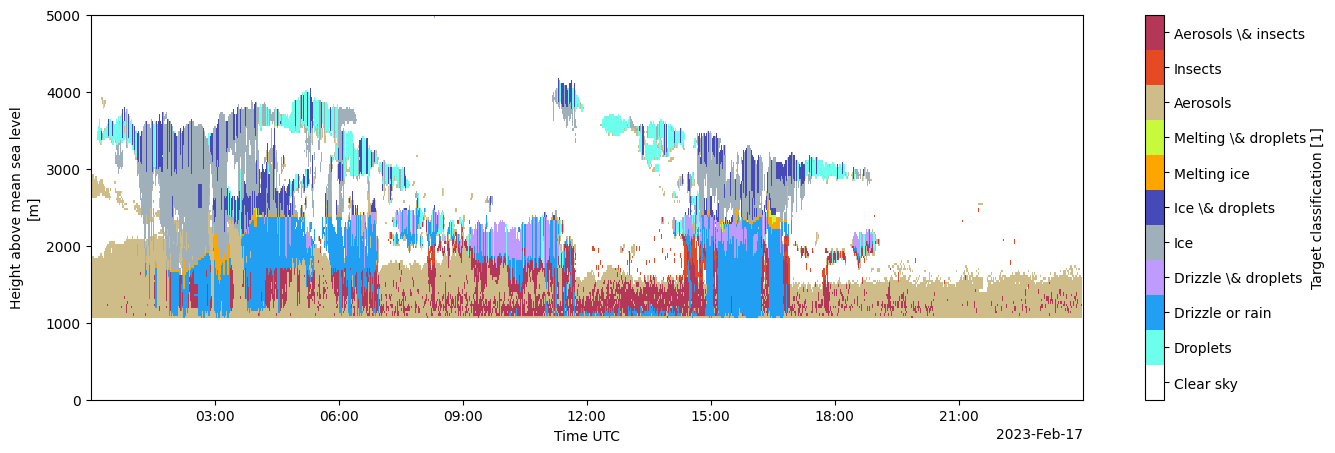

In [ ]:

cloudnet_class_labels, cloudnet_cmap = get_cloudnet_cmap()

fig, ax = plt.subplots(figsize=(16, 5))
# plot the target classification, important to set vmax to 11 to include all classes and make the ticks match the center of colors
xr_class['target_classification'].T.plot(ax=ax, ylim=(0, 5000), cmap=cloudnet_cmap, vmax=11)
# Add colorbar labels
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(len(cloudnet_class_labels)) + 0.5)
cbar.set_ticklabels(cloudnet_class_labels)


In [100]:
# splitting LV0 files into training and validation data set
rpg_lv0_files_fn0 = sorted(glob.glob(f'/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/*.LV0'))[::10] # use every 10th file

rpg_lv0_files_fn1 = sorted(glob.glob(f'/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/*.LV0'))[1::10] # use every 10th file

rpg_lv0_files_fn2 = sorted(glob.glob(f'/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/*.LV0'))[2::10] # use every 10th file

In [9]:

print(f'CUDA available: {torch.cuda.is_available()},  Number of CUDA devices: {torch.cuda.device_count()}')

# cuda:0, cuda:1, cuda:2, cuda:3

CUDA available: False,  Number of CUDA devices: 0


In [101]:
rpg_lv0_files_fn0

['/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/230217_000004_P03_ZEN.LV0',
 '/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/230217_100004_P03_ZEN.LV0',
 '/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/230217_200001_P03_ZEN.LV0']

In [39]:
all_rpg_lv0_files = rpg_lv0_files_training + rpg_lv0_files_validation

In [88]:
# setup voodoo model for training

model_options = voodoonet.utils.VoodooOptions(
    device="mps", 
    progress_bar=True,
    z_limits = (-50, 20) # spectrum normalization limits in dBZ
    )


training_options = voodoonet.utils.VoodooTrainingOptions(
    dupe_droplets = 1,
    learning_rate = 1.0e-3,
    learning_rate_decay = 1.0e-1,
    learning_rate_decay_steps = 1,
    shuffle = True,
    split = 0.1,  # -> 10% of data for validation
    epochs = 3,
    batch_size = 256,
    # wandb=voodoonet.utils.WandbConfig(
    #     project='voodoo2.5',
    #     name='voodoo-4sites-model',
    #     entity='krljhnsn'
    # ),
)

In [89]:
# generate training data set
voodoonet.generate_training_data(all_rpg_lv0_files, classification_files, f'training-data-set-eriswil-100pct--50-20.pt')

ERROR:root:Error reading RPG file /Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/230217_030003_P03_ZEN.LV0


In [72]:
# load pytorch training data
training_data = torch.load('training-data-set-eriswil-100pct.pt')

In [73]:
print(f'training_data["features"].shape: {training_data["features"].shape}')
print(f'training_data["labels"].shape: {training_data["labels"].shape}')

training_data["features"].shape: torch.Size([11830, 256, 6])
training_data["labels"].shape: torch.Size([11830])


In [90]:
# fig, ax = plt.subplots(figsize=(16, 5))
# z_limits = (-50, 20) # spectrum normalization limits in dBZ
# normalized_spec = training_data["features"]#[20, ...]
# denormalized_spec = normalized_spec*(z_limits[1] - z_limits[0]) + z_limits[0]

# pmesh = ax.pcolormesh(denormalized_spec[20, ...], vmin=z_limits[0], vmax=z_limits[1])
# cbar = fig.colorbar(pmesh, ax=ax, label='dBZ')
# cbar.ax.tick_params(labelsize=14)
# ax.set_title(f'Training data, maxval = {denormalized_spec.max():.2f} dBZ' )
# ax.set_xlabel('Time bin')
# ax.set_ylabel('Doppler bin')

# print(f'min dataset = {denormalized_spec.min()}')
# print(f'max dataset = {denormalized_spec.max()}')

In [94]:



# create a lambda function that returns the training data set file for given year
training_data_set0 = f'training-data-set-eriswil-100pct--55-5dBZ.pt'
training_data_set1 = f'training-data-set-eriswil-100pct--50-20dBZ.pt'
new_model_file0 = f'Voodoo-4sites-model-{model_options.device}--55-5dBZ.pt'
new_model_file1 = f'Voodoo-4sites-model-{model_options.device}--50-20dBZ.pt'


In [95]:
voodoonet.train(
    training_data_set0, 
    new_model_file0, 
    model_options=model_options, 
    training_options=training_options,
    )

100%|█████████████████████████████████████████████| 41/41 [00:02<00:00, 16.28 batches - epoch:3/3/s]


In [96]:
voodoonet.train(
    training_data_set1, 
    new_model_file1, 
    model_options=model_options, 
    training_options=training_options,
    )

100%|█████████████████████████████████████████████| 41/41 [00:02<00:00, 16.54 batches - epoch:3/3/s]


# Make predictions with new model

In [102]:
# define device (GPU or CPU) and progress bar
options0 = voodoonet.utils.VoodooOptions(
    device="mps", 
    progress_bar=True,
    trained_model=new_model_file0
    )
options1 = voodoonet.utils.VoodooOptions(
    device="mps", 
    progress_bar=True,
    trained_model=new_model_file1
    )

# inference
probability_liquid0 = voodoonet.infer(all_rpg_lv0_files, options=options0)
probability_liquid1 = voodoonet.infer(all_rpg_lv0_files, options=options1)

100%|████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 122.77 batches/s]
ERROR:root:Error reading RPG file /Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/230217_030003_P03_ZEN.LV0
100%|████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 120.52 batches/s]
ERROR:root:Error reading RPG file /Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/230217_030003_P03_ZEN.LV0
100%|██████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 513.69 batches/s]


/var/folders/j5/n57yv0hs2jgf_v55xfsn5phm0000gp/T/ipykernel_55197/2511131629.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = matplotlib.cm.get_cmap('viridis', 256)


Text(0.5, 1.0, 'Default model')

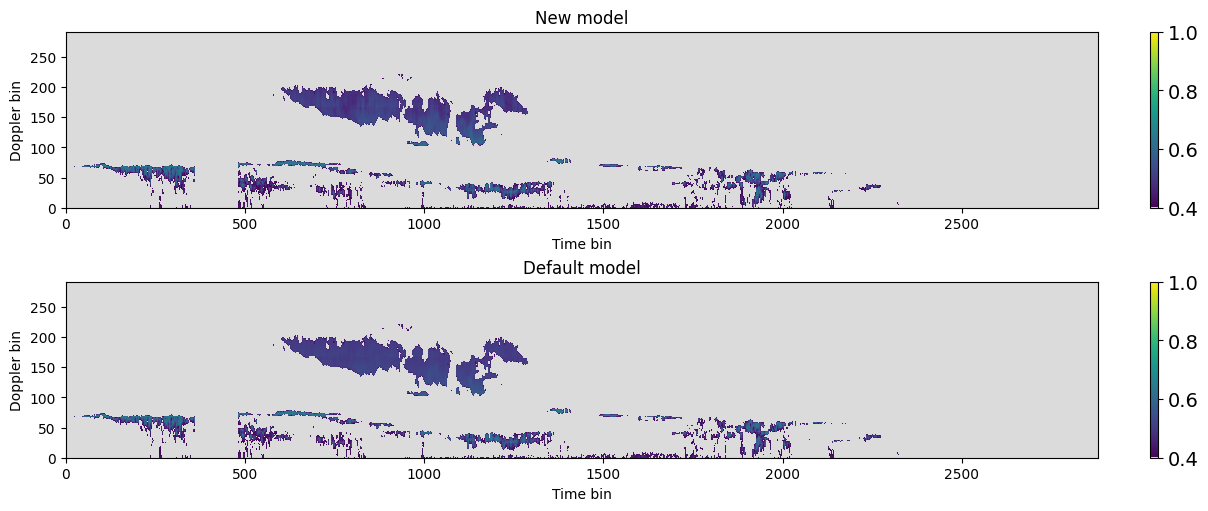

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 5), constrained_layout=True)

pmesh0=ax[0].pcolormesh(probability_liquid0.T, cmap=get_voodoo_cmap(), vmin=0.4, vmax=1)
pmesh1=ax[1].pcolormesh(probability_liquid1.T, cmap=get_voodoo_cmap(), vmin=0.4, vmax=1)
for i, pmesh in zip(range(2), [pmesh0, pmesh1]):
    cbar = fig.colorbar(pmesh, ax=ax[i])
    cbar.ax.tick_params(labelsize=14)
    ax[i].set_title('Probability of liquid droplets')
    ax[i].set_xlabel('Time bin')
    ax[i].set_ylabel('Doppler bin')

ax[0].set_title('New model')
ax[1].set_title('Default model')

Text(0.5, 1.0, 'Differnce z_limits = (-55 to 5) - (-50 to 20)')

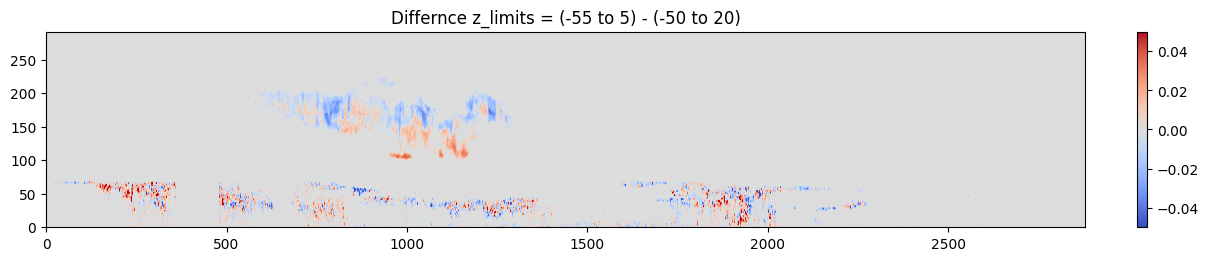

In [111]:
fig, ax = plt.subplots(nrows=1, figsize=(12, 2.5), constrained_layout=True)

pmesh0=ax.pcolormesh(probability_liquid0.T-probability_liquid1.T, cmap='coolwarm', vmin=-0.05, vmax=0.05)
cbar = fig.colorbar(pmesh0, ax=ax)
ax.set_title(f'Differnce z_limits = (-55 to 5) - (-50 to 20)')

In [56]:
xr_ds_voodooclass = xr.open_dataset('/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/20230217_classification_voodoo.nc')

In [59]:
xr_class

<xarray.Dataset> Size: 16MB
Dimensions:                 (time: 2826, height: 477)
Coordinates:
  * time                    (time) datetime64[ns] 23kB 2023-02-17T00:00:15.00...
  * height                  (height) float32 2kB 1.077e+03 ... 1.592e+04
Data variables:
    target_classification   (time, height) float64 11MB ...
    detection_status        (time, height) int32 5MB ...
    cloud_base_height_amsl  (time) float32 11kB ...
    cloud_top_height_amsl   (time) float32 11kB ...
    cloud_base_height_agl   (time) float32 11kB ...
    cloud_top_height_agl    (time) float32 11kB ...
    altitude                float32 4B ...
    latitude                float32 4B ...
    longitude               float32 4B ...
Attributes: (12/15)
    Conventions:                  CF-1.8
    cloudnetpy_version:           1.55.15
    file_uuid:                    58c290bc-0c77-41bc-bea8-e0121a33f07d
    cloudnet_file_type:           classification
    title:                        Classification products from Eriswil
    source_file_uuids:            eb78205f-839c-49f4-8887-2c532a51fa05
    ...                           ...
    year:                         2023
    source:                       METEK MIRA-35\nTROPOS PollyXT\nRPG-Radiomet...
    history:                      2023-10-12 09:11:32 +00:00 - classification...
    references:                   https://doi.org/10.21105/joss.02123
    cloudnet_processing_version:  2.26.3
    pid:                          https://hdl.handle.net/21.12132/1.58c290bc0...

In [58]:
xr_ds_voodooclass

<xarray.Dataset> Size: 10MB
Dimensions:                 (time: 2880, height: 292)
Coordinates:
  * time                    (time) datetime64[ns] 23kB 2023-02-17T00:00:15.00...
  * height                  (height) float32 1kB 1.04e+03 1.07e+03 ... 1.289e+04
Data variables:
    target_classification   (time, height) float64 7MB ...
    detection_status        (time, height) int32 3MB ...
    cloud_base_height_amsl  (time) float32 12kB ...
    cloud_top_height_amsl   (time) float32 12kB ...
    cloud_base_height_agl   (time) float32 12kB ...
    cloud_top_height_agl    (time) float32 12kB ...
    altitude                float32 4B ...
    latitude                float32 4B ...
    longitude               float32 4B ...
Attributes: (12/14)
    Conventions:         CF-1.8
    cloudnetpy_version:  1.61.5
    file_uuid:           3dae8784-39cf-439f-b519-236306f13a29
    cloudnet_file_type:  classification
    title:               Classification products from Eriswil
    source_file_uuids:   3d317e1a-5d66-427e-9ee4-e8dcbb43daad
    ...                  ...
    month:               02
    year:                2023
    source:              RPG-Radiometer Physics RPG-FMCW-94\nLufft CHM15kx\nR...
    voodoonet_version:   0.1.8
    history:             2024-04-30 14:20:39 +00:00 - classification file cre...
    references:          https://doi.org/10.21105/joss.02123

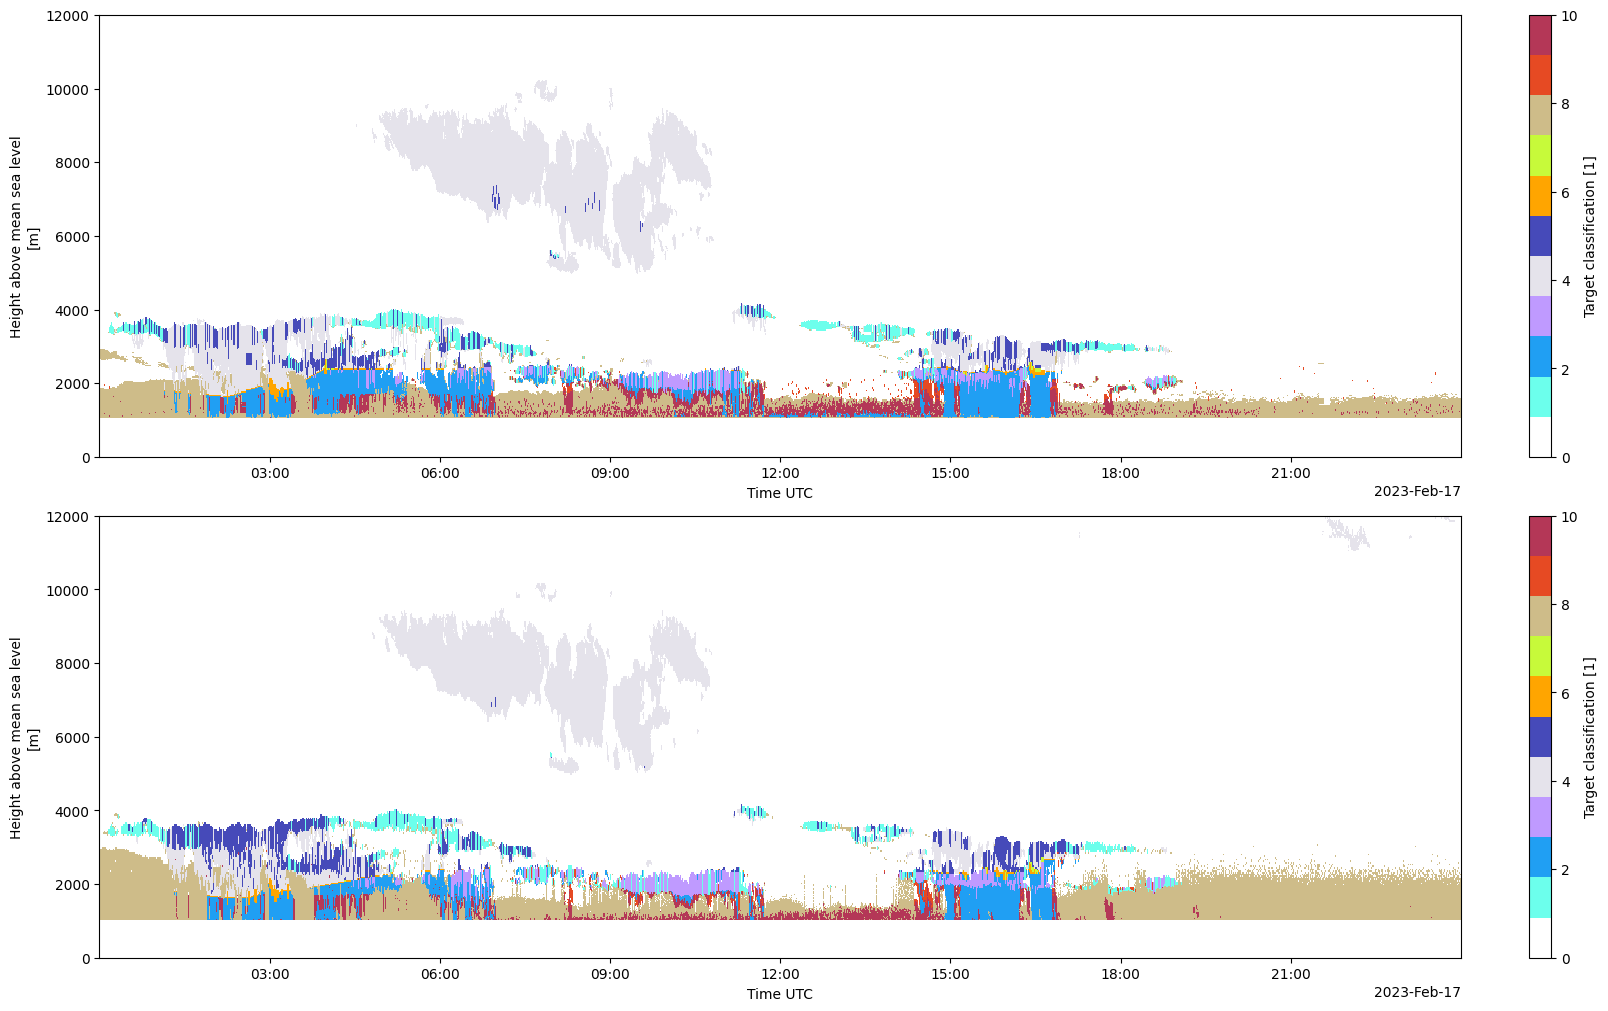

In [57]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 10), constrained_layout=True)
xr_class['target_classification'].T.plot(ax=ax[0], ylim=(0,12000), cmap=cloudnet)
xr_ds_voodooclass['target_classification'].T.plot(ax=ax[1], ylim=(0,12000), cmap=cloudnet)
# pcm = ax[1].pcolormesh(probability_liquid.T, cmap=get_voodoo_cmap(), vmin=0.4, vmax=1)
# cbar = fig.colorbar(pcm, ax=ax[1], label='Probability of liquid droplets')
# cbar.ax.tick_params(labelsize=14)
# ax[0].set_title('Target classification')
# ax[1].set_title('Probability of liquid droplets')

/var/folders/j5/n57yv0hs2jgf_v55xfsn5phm0000gp/T/ipykernel_55197/2912821478.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = matplotlib.cm.get_cmap('viridis', 256)


Text(0.5, 1.0, 'Probability of liquid droplets')

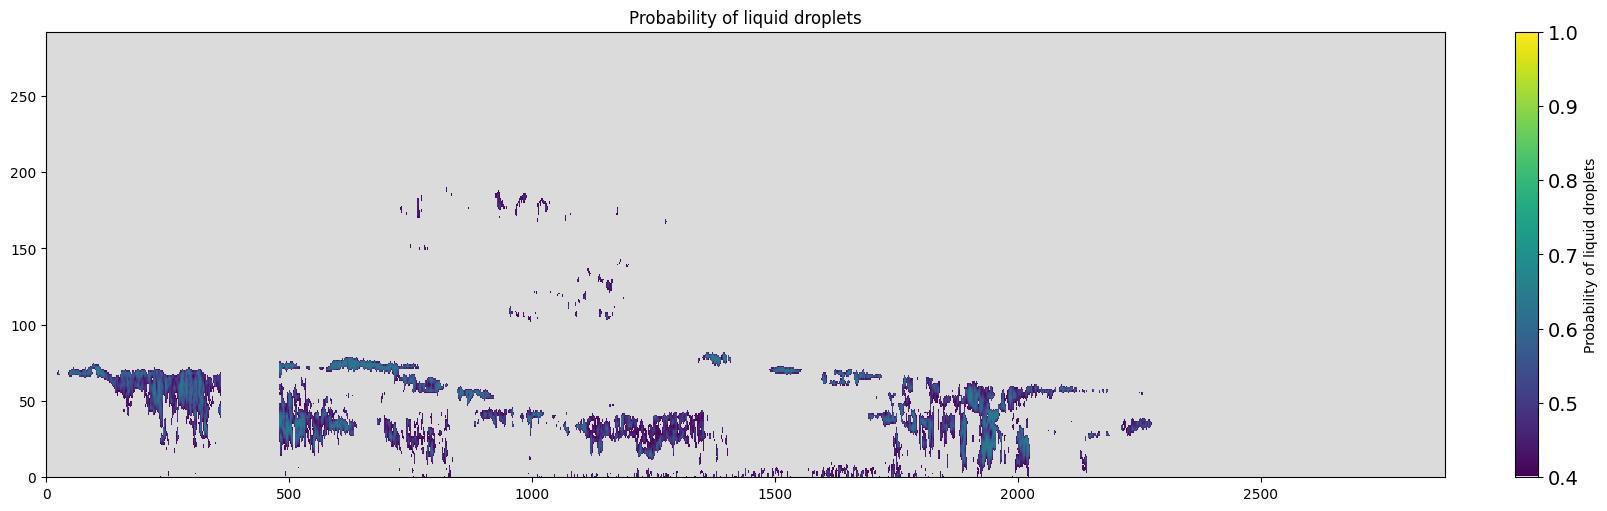

In [43]:
fig, ax = plt.subplots(nrows=1, figsize=(16, 5), constrained_layout=True)
#xr_class['target_classification'].T.plot(ax=ax[0], ylim=(0, 5000), cmap=cloudnet)
pcm = ax.pcolormesh(probability_liquid.T, cmap=get_voodoo_cmap(), vmin=0.4, vmax=1)
cbar = fig.colorbar(pcm, ax=ax, label='Probability of liquid droplets')
cbar.ax.tick_params(labelsize=14)
ax.set_title('Probability of liquid droplets')